In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Loading the required datasets

results_2023 = pd.read_csv('../data/2023_results.csv')
races_2023 = pd.read_csv('../data/2023_races.csv')
results_2024 = pd.read_csv('../data/2024_results.csv')
races_2024 = pd.read_csv('../data/2024_races.csv')
boston_men = pd.read_csv('../data/boston_men.csv')
boston_women = pd.read_csv('../data/boston_women.csv')
survey_summary = pd.read_csv('../data/survey_summary.csv')

In [3]:
results_2023.head()


,Name,Race,Year,Gender,Age,Finish,Age Bracket
0,Arunas Jurkus,Salt Lake City Marathon,2023,M,55,12907,55-59
1,Seth Reed,Salt Lake City Marathon,2023,M,24,12921,Under 35
2,Mufaro Chivasa,Salt Lake City Marathon,2023,M,54,12948,50-54
3,Adam Cheney,Salt Lake City Marathon,2023,M,22,12954,Under 35
4,Michael Pyles,Salt Lake City Marathon,2023,M,33,12964,Under 35


In [4]:
results_2024.head()

,Name,Race,Year,Gender,Finish,Age Group
0,Zouhair Talbi,Houston Marathon,2024,Men,7599,25-29
1,Tsedat Ayana,Houston Marathon,2024,Men,7620,25-29
2,Hendrik Pfeiffer,Houston Marathon,2024,Men,7634,30-34
3,Pat Tiernan,Houston Marathon,2024,Men,7665,25-29
4,Hugo Edgardo Catrileo Tapia,Houston Marathon,2024,Men,7724,25-29


We are missing 'Age' from the 2024 results dataset compared to the 2023 results and we need to standardize the 'Gender' column.

In [5]:
races_2023.head()

,Race,Year,Date,Finishers
0,NYC Marathon,2023,11/5/23,51295
1,Chicago Marathon,2023,10/8/23,48574
2,Boston Marathon,2023,4/17/23,26600
3,LA Marathon,2023,3/19/23,16973
4,Honolulu Marathon,2023,12/10/23,15044


In [6]:
races_2024.head()

,Race,Year,Date,Finishers
0,Houston Marathon,2024,2024-01-14,7180
1,Atlanta Marathon,2024,2024-02-24,1582
2,Disney World Marathon,2024,2024-01-03,12710
3,Carmel Marathon,2024,2024-04-13,1451
4,Jack and Jill Downhill Marathon,2024,2024-07-27,701


In [7]:
boston_men.head()

,Year,Winner,Country,Time,Distance (Miles),Distance (KM)
0,1897.0,John McDermott,United States,02:55:10,24.5,39.4
1,1898.0,Ronald MacDonald,Canada,02:42:00,24.5,39.4
2,1899.0,Lawrence Brignolia,United States,02:54:38,24.5,39.4
3,1900.0,Jack Caffery,Canada,02:39:44,24.5,39.4
4,1901.0,Jack Caffery,Canada,02:29:23,24.5,39.4


In [8]:
boston_women.head()

,Year,Winner,Country,Time,Distance (Miles),Distance (KM)
0,1966.0,Bobbi Gibb,United States,3:21:40,26.2,42.2
1,1967.0,Bobbi Gibb,United States,3:27:17,26.2,42.2
2,1968.0,Bobbi Gibb,United States,3:30:00,26.2,42.2
3,1969.0,Sara Mae Berman,United States,3:22:46,26.2,42.2
4,1970.0,Sara Mae Berman,United States,3:05:07,26.2,42.2


In [9]:
survey_summary.head()

,Category,Subcategory,Value,Type
0,Gender,Female,55,%
1,Gender,Male,43,%
2,Gender,Non-binary,2,%
3,Age,Under 25,7,%
4,Age,25-34,24,%


In [10]:
results_2023.isnull().sum()

Name           0
Race           0
Year           0
Gender         0
Age            0
Finish         0
Age Bracket    0
dtype: int64

In [11]:
results_2024.isnull().sum()

Name         0
Race         0
Year         0
Gender       0
Finish       0
Age Group    0
dtype: int64

In [12]:
races_2023.isnull().sum()

Race         0
Year         0
Date         0
Finishers    0
dtype: int64

In [13]:
races_2024.isnull().sum()

Race         0
Year         0
Date         0
Finishers    0
dtype: int64

In [14]:
boston_men.isnull().sum()

Year                2
Winner              2
Country             2
Time                2
Distance (Miles)    2
Distance (KM)       2
dtype: int64

In [15]:
boston_women.isnull().sum()

Year                1
Winner              1
Country             1
Time                1
Distance (Miles)    0
Distance (KM)       0
dtype: int64

There is a small number of missing values in the Boston Marathon Winners data. We will drop these rows safely in the cleaning phase since there are very few.

In [16]:
survey_summary.isnull().sum()

Category       0
Subcategory    0
Value          0
Type           0
dtype: int64

In [17]:
#All columns lowercase and replace spaces with underscore

def clean_columns(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df

results_2023 = clean_columns(results_2023)
results_2024 = clean_columns(results_2024)
races_2023 = clean_columns(races_2023)
races_2024 = clean_columns(races_2024)
boston_men = clean_columns(boston_men)
boston_women = clean_columns(boston_women)
survey_summary = clean_columns(survey_summary)

In [18]:
#NaN for missing `Age` in 2024 results dataset

results_2024['age'] = np.nan

In [19]:
#Drop missing rows in Boston Marathon Datasets

boston_men.dropna(subset = ['year', 'winner', 'country', 'time'], inplace = True)
boston_women.dropna(subset = ['year', 'winner', 'country', 'time'], inplace = True)

In [20]:
#Standardize Columns for Consistency

boston_men = clean_columns(boston_men)
boston_women = clean_columns(boston_women)

In [21]:
results_2024.head()

,name,race,year,gender,finish,age_group,age
0,Zouhair Talbi,Houston Marathon,2024,Men,7599,25-29,NaN
1,Tsedat Ayana,Houston Marathon,2024,Men,7620,25-29,NaN
2,Hendrik Pfeiffer,Houston Marathon,2024,Men,7634,30-34,NaN
3,Pat Tiernan,Houston Marathon,2024,Men,7665,25-29,NaN
4,Hugo Edgardo Catrileo Tapia,Houston Marathon,2024,Men,7724,25-29,NaN


In [22]:
boston_men.isnull().sum()

year                0
winner              0
country             0
time                0
distance_(miles)    0
distance_(km)       0
dtype: int64

In [23]:
boston_women.isnull().sum()

year                0
winner              0
country             0
time                0
distance_(miles)    0
distance_(km)       0
dtype: int64

results_2024 now has the 'Age' column so we can combine it with results_2023. We dropped the rows in boston_men and boston_women so now there is zero null values.

Need to verify columns are the same before we combine.

In [24]:
set(results_2023.columns) == set(results_2024.columns)

False

In [25]:
print('Columns in 2023 not in 2024:', set(results_2023.columns) - set(results_2024.columns))
print('Columns in 2024 not in 2023:', set(results_2024.columns) - set(results_2023.columns))

Columns in 2023 not in 2024: {'age_bracket'}
Columns in 2024 not in 2023: {'age_group'}


In [26]:
print("2023 columns:", results_2023.columns)
print("2024 columns:", results_2024.columns)

print("2023 groups:", results_2023['age_bracket'].unique())
print("2024 groups:", results_2024['age_group'].unique())

2023 columns: Index(['name', 'race', 'year', 'gender', 'age', 'finish', 'age_bracket'], dtype='object')
2024 columns: Index(['name', 'race', 'year', 'gender', 'finish', 'age_group', 'age'], dtype='object')
2023 groups: ['55-59' 'Under 35' '50-54' '45-49' '35-39' '40-44' '60-64' 'Unknown'
 '65-69' '80 and Over' '70-74' '75-79']
2024 groups: ['25-29' '30-34' '35-39' '40-44' '20-24' '45-49' '50-54' 'Under 20'
 '55-59' '60-64' '65-69' '70-74' '75-79' '80 and Over']


Adding a function next to make consistent bins for the age groups in both results datasets.

In [27]:
#Defining a function
def standardize_age_group(age):
    if pd.isnull(age):
        return 'Unknown'
    elif age < 20:
        return 'Under 20'
    elif 20 <= age <= 24:
        return '20-24'
    elif 25 <= age <= 29:
        return '25-29'
    elif 30 <= age <= 34:
        return '30-34'
    elif 35 <= age <= 39:
        return '35-39'
    elif 40 <= age <= 44:
        return '40-44'
    elif 45 <= age <= 49:
        return '45-49'
    elif 50 <= age <= 54:
        return '50-54'
    elif 55 <= age <= 59:
        return '55-59'
    elif 60 <= age <= 64:
        return '60-64'
    elif 65 <= age <= 69:
        return '65-69'
    elif 70 <= age <= 74:
        return '70-74'
    elif 75 <= age <= 79:
        return '75-79'
    else:
        return '80 and Over'

In [28]:
results_2023['age_group'] = results_2023['age'].apply(standardize_age_group)
results_2024['age_group'] = results_2024['age'].apply(standardize_age_group)

In [29]:
print('2023 columns:', results_2023.columns)
print('2024 columns:', results_2024.columns)

2023 columns: Index(['name', 'race', 'year', 'gender', 'age', 'finish', 'age_bracket',
       'age_group'],
      dtype='object')
2024 columns: Index(['name', 'race', 'year', 'gender', 'finish', 'age_group', 'age'], dtype='object')


In [30]:
#Drop the 'age_bracket' from 2023 since its redundant
results_2023 = results_2023.drop(columns = ['age_bracket'])

In [31]:
print('2023 columns after drop:', results_2023.columns)
print('2024 columns:', results_2024.columns)

2023 columns after drop: Index(['name', 'race', 'year', 'gender', 'age', 'finish', 'age_group'], dtype='object')
2024 columns: Index(['name', 'race', 'year', 'gender', 'finish', 'age_group', 'age'], dtype='object')


Need to standardize the `Gender` labels in 2023 results before we combine.

In [32]:
#Standardize 'Gender' results 2023
results_2023['gender_standard'] = results_2023['gender'].replace({
    'M': 'Men',
    'F': 'Women',
    'X': 'Other',
    'U': 'Other'
})

#Copy column to match the new name
results_2024['gender_standard'] = results_2024['gender']  # already Male/Female/Non-Binary

In [33]:
#Getting the columns in the correct order
results_2024 = results_2024[['name', 'race', 'year', 'gender', 'age', 'finish', 'age_group']]

In [34]:
print('2023 columns:', results_2023.columns)
print('2024 columns:', results_2024.columns)

2023 columns: Index(['name', 'race', 'year', 'gender', 'age', 'finish', 'age_group',
       'gender_standard'],
      dtype='object')
2024 columns: Index(['name', 'race', 'year', 'gender', 'age', 'finish', 'age_group'], dtype='object')


In [35]:
combined_results = pd.concat([results_2023, results_2024], ignore_index = True)

In [36]:
combined_results['year'].unique()

array([2023, 2024])

In [37]:
#Copy the original gender column
combined_results.loc[combined_results['year'] == 2024, 'gender_standard'] = combined_results.loc[combined_results['year'] == 2024, 'gender']

In [38]:
#Verify 'Gender_standard' column has correct values
combined_results.groupby('year')['gender_standard'].unique()

year
2023         [Men, Women, Other]
2024    [Men, Women, Non-Binary]
Name: gender_standard, dtype: object

In [39]:
combined_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026921 entries, 0 to 1026920
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   name             1026921 non-null  object 
 1   race             1026921 non-null  object 
 2   year             1026921 non-null  int64  
 3   gender           1026921 non-null  object 
 4   age              429266 non-null   float64
 5   finish           1026921 non-null  int64  
 6   age_group        1026921 non-null  object 
 7   gender_standard  1026921 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 62.7+ MB


In [40]:
combined_results.head()

,name,race,year,gender,age,finish,age_group,gender_standard
0,Arunas Jurkus,Salt Lake City Marathon,2023,M,55.0,12907,55-59,Men
1,Seth Reed,Salt Lake City Marathon,2023,M,24.0,12921,20-24,Men
2,Mufaro Chivasa,Salt Lake City Marathon,2023,M,54.0,12948,50-54,Men
3,Adam Cheney,Salt Lake City Marathon,2023,M,22.0,12954,20-24,Men
4,Michael Pyles,Salt Lake City Marathon,2023,M,33.0,12964,30-34,Men


Some results have exact ages while other only have an age group. For consistent analysis we convert age groups into approximate values and combine it with existing ages.

In [41]:
#Define mapping from age groups to midpoints
age_map = {
    'Under 20': 18,
    '20-24': 22,
    '25-29': 27,
    '30-34': 32,
    '35-39': 37,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52,
    '55-59': 57,
    '60-64': 62,
    '65-69': 67,
    '70-74': 72,
    '75-79': 77,
    '80 and Over': 82,
}

In [42]:
#New column age_numeric, prioritizing age otherwise use age_map
combined_results['age_numeric'] = combined_results['age'].fillna(
    combined_results['age_group'].map(age_map)
)

In [43]:
print('Rows with unknown age:', combined_results['age_numeric'].isna().sum())

Rows with unknown age: 597655


In [44]:
combined_results[['age', 'age_group', 'age_numeric']].head(20)

,age,age_group,age_numeric
0,55.0,55-59,55.0
1,24.0,20-24,24.0
2,54.0,50-54,54.0
3,22.0,20-24,22.0
4,33.0,30-34,33.0
5,30.0,30-34,30.0
6,31.0,30-34,31.0
7,28.0,25-29,28.0
8,20.0,20-24,20.0
9,49.0,45-49,49.0


In [45]:
combined_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026921 entries, 0 to 1026920
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   name             1026921 non-null  object 
 1   race             1026921 non-null  object 
 2   year             1026921 non-null  int64  
 3   gender           1026921 non-null  object 
 4   age              429266 non-null   float64
 5   finish           1026921 non-null  int64  
 6   age_group        1026921 non-null  object 
 7   gender_standard  1026921 non-null  object 
 8   age_numeric      429266 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 70.5+ MB


In [46]:
combined_results.describe()

,year,age,finish,age_numeric
count,1.026921e+06,429266.000000,1.026921e+06,429266.000000
mean,2.023582e+03,39.344945,1.641320e+04,39.344945
std,4.932325e-01,13.562503,4.143824e+03,13.562503
min,2.023000e+03,-1.000000,6.806000e+03,-1.000000
25%,2.023000e+03,29.000000,1.348600e+04,29.000000
50%,2.024000e+03,39.000000,1.578000e+04,39.000000
75%,2.024000e+03,49.000000,1.866500e+04,49.000000
max,2.024000e+03,100.000000,6.229600e+04,100.000000


In [47]:
#Filter invalid ages ( > 0 ) but keep unknowns
combined_results = combined_results[(combined_results['age_numeric'].isna())|
                                    (combined_results['age_numeric'] > 0)]

In [48]:
#Finish time from seconds to hours (float)
combined_results['finish_hours'] = combined_results['finish'] / 3600

#Format to (HH:MM)
combined_results['finished_hm'] = pd.to_timedelta(combined_results['finish'], unit = 's')

In [49]:
print('Years present:', combined_results['year'].unique())

print('Genderr labels:', combined_results['gender_standard'].unique())

Years present: [2023 2024]
Genderr labels: ['Men' 'Women' 'Other' 'Non-Binary']


In [50]:
races_combined = pd.concat([races_2023, races_2024])

In [51]:
print(races_combined.columns)

Index(['race', 'year', 'date', 'finishers'], dtype='object')


## Participation Trends

Which races had the highest participation in 2023 and 2024, and how did the number of finishers change year over year?

In [52]:
#Finishers per race
race_counts = races_combined.groupby('race')['finishers'].sum().sort_values(ascending=False)

In [53]:
#Top 20 races
top_20_races = race_counts.head(20).index
finishers_top20 = races_combined[races_combined['race'].isin(top_20_races)]

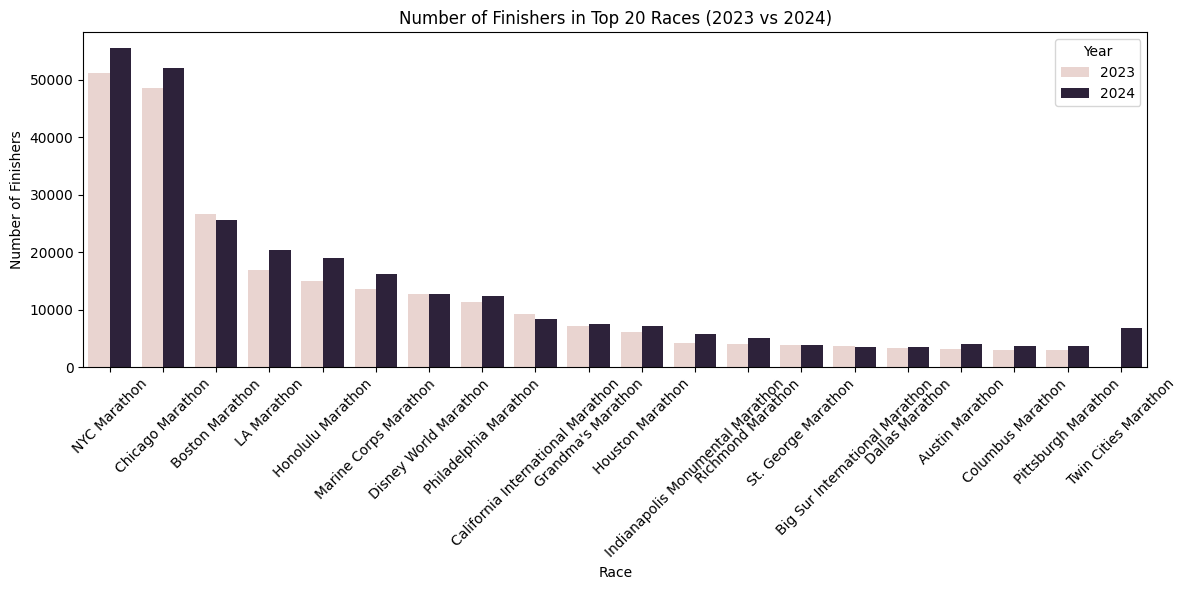

In [54]:
#Plot
plt.figure(figsize = (12, 6))
sns.barplot(data = finishers_top20, x = 'race', y = 'finishers', hue = 'year')
plt.title('Number of Finishers in Top 20 Races (2023 vs 2024)')
plt.xlabel('Race')
plt.ylabel('Number of Finishers')
plt.xticks(rotation = 45)
plt.legend(title = 'Year')
plt.tight_layout()
plt.show()

In [55]:
finishers_table = finishers_top20.pivot(index='race', columns='year', values='finishers').fillna(0)
finishers_table = finishers_table.sort_values(by=2024, ascending=False)
print(finishers_table)


year                                  2023     2024
race                                               
NYC Marathon                       51295.0  55525.0
Chicago Marathon                   48574.0  52022.0
Boston Marathon                    26600.0  25550.0
LA Marathon                        16973.0  20475.0
Honolulu Marathon                  15044.0  18984.0
Marine Corps Marathon              13662.0  16168.0
Disney World Marathon              12690.0  12710.0
Philadelphia Marathon              11412.0  12381.0
California International Marathon   9183.0   8373.0
Grandma's Marathon                  7182.0   7548.0
Houston Marathon                    6105.0   7180.0
Twin Cities Marathon                   0.0   6797.0
Indianapolis Monumental Marathon    4214.0   5672.0
Richmond Marathon                   4083.0   5029.0
Austin Marathon                     3192.0   4002.0
St. George Marathon                 3815.0   3894.0
Pittsburgh Marathon                 3000.0   3650.0
Columbus Mar

### Findings: Finishers in Top 20 Marathons (2023 vs 2024)

Most major races grew in 2024, with NYC and Chicago topping 50k finishers.  
Boston dipped slightly, while LA, Honolulu, and Houston saw big gains.  
Overall, participation trended upward across most events.


What is the percentage breakdown of male and female finishers in the 2023 and 2024 marathons, and how does this reflect trends in gender participation over time?

In [56]:
combined_results.head()



,name,race,year,gender,age,finish,age_group,gender_standard,age_numeric,finish_hours,finished_hm
0,Arunas Jurkus,Salt Lake City Marathon,2023,M,55.0,12907,55-59,Men,55.0,3.585278,0 days 03:35:07
1,Seth Reed,Salt Lake City Marathon,2023,M,24.0,12921,20-24,Men,24.0,3.589167,0 days 03:35:21
2,Mufaro Chivasa,Salt Lake City Marathon,2023,M,54.0,12948,50-54,Men,54.0,3.596667,0 days 03:35:48
3,Adam Cheney,Salt Lake City Marathon,2023,M,22.0,12954,20-24,Men,22.0,3.598333,0 days 03:35:54
4,Michael Pyles,Salt Lake City Marathon,2023,M,33.0,12964,30-34,Men,33.0,3.601111,0 days 03:36:04


In [57]:
#Count finishers by year and gender
gender_counts = combined_results.groupby(['year', 'gender_standard']).size().unstack(fill_value = 0)

#Find Percentage
gender_percentage = gender_counts.div(gender_counts.sum(axis = 1), axis = 0) * 100

In [58]:
#Defining Colors for Plot
colors = {'Men': 'blue', 'Women': 'pink', 'Non-Binary': 'purple', 'Other': 'gray'}

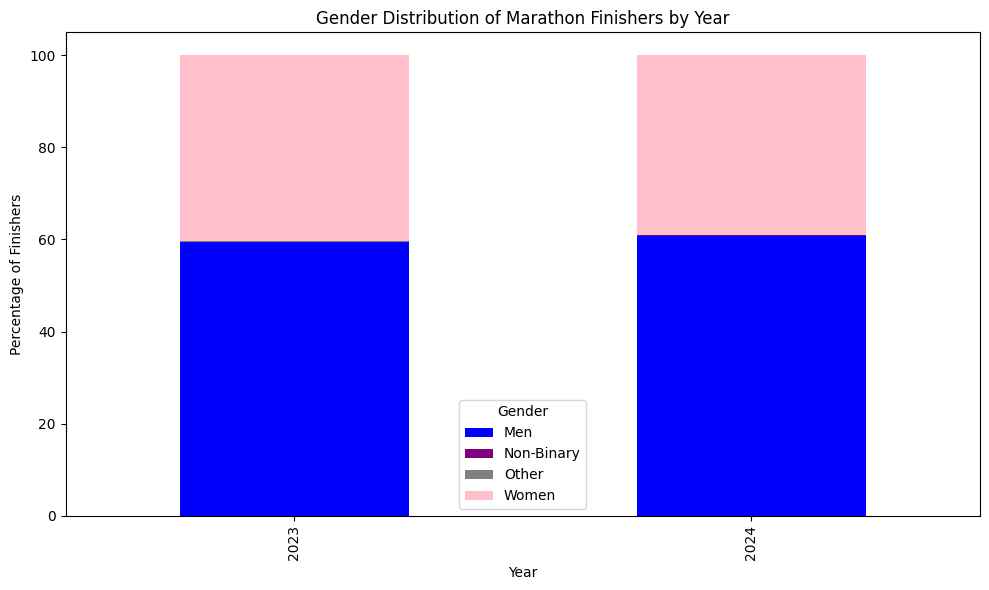

In [59]:
#Plot
gender_percentage.plot(kind = 'bar', stacked = True, figsize = (10, 6), color = [colors[col] for col in gender_percentage.columns])
plt.title('Gender Distribution of Marathon Finishers by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Finishers')
plt.legend(title = 'Gender')
plt.tight_layout()
plt.show()

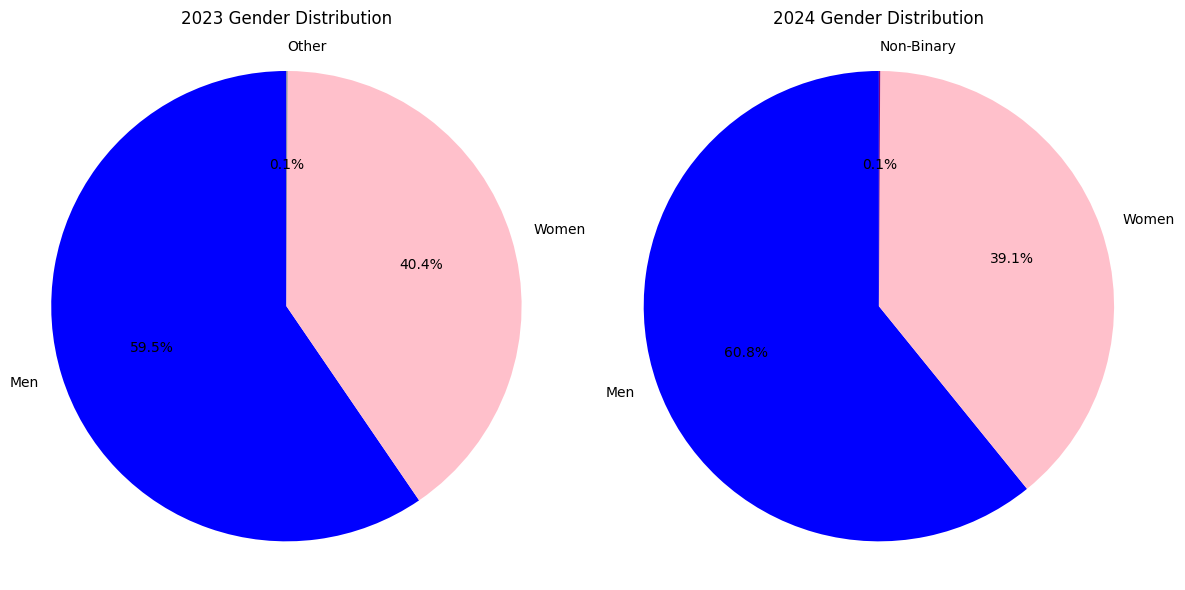

In [70]:
colors_pie = {
    'Men': 'blue',
    'Women': 'pink',
    'Non-Binary': 'purple',
    'Other': 'gray'
}

#Data for each year
gender_2023 = combined_results[combined_results['year'] == 2023]['gender_standard'].value_counts()
gender_2024 = combined_results[combined_results['year'] == 2024]['gender_standard'].value_counts()

#Figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

#2023 Pie Chart
colors_used_2023 = [colors_pie[col] for col in gender_2023.index]
axes[0].pie(gender_2023, labels=gender_2023.index, autopct='%1.1f%%', colors=colors_used_2023, startangle=90)
axes[0].set_title('2023 Gender Distribution')
axes[0].axis('equal')

#2024 Pie Chart
colors_used_2024 = [colors_pie[col] for col in gender_2024.index]
axes[1].pie(gender_2024, labels=gender_2024.index, autopct='%1.1f%%', colors=colors_used_2024, startangle=90)
axes[1].set_title('2024 Gender Distribution')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

### Gender Distribution of Marathon Finishers

- **2023:** Men 59.5%, Women 40.4%, Other 0.1%  
- **2024:** Men 60.8%, Women 39.1%, Non-Binary 0.1%  

>Gender proportions are relatively stable, showing that male and female participation dominates, while Other/Non-Binary categories remain minimal.